In [1]:
import numpy as np
import matplotlib.pyplot as plt

def acceptance_rate(chain: np.ndarray) -> float:
    rejects = np.sum(chain[1:] == chain[:-1])
    return 1.0 - rejects / (len(chain) - 1)

In [2]:
run_file = "sim_run.npz"

data = np.load(run_file)

print("Arrays stored in this run:")
for k in data.files:
    print(" ", k, data[k].shape)

Arrays stored in this run:
  X_true (6, 30, 2)
  Y (6, 30, 30)
  X_chain (7000, 6, 30, 2)
  R_chain (7000, 30)
  betaIN_chain (7000,)
  betaOUT_chain (7000,)
  tauSq_chain (7000,)
  sigmaSq_chain (7000,)


In [3]:
X_true        = data["X_true"]
Y             = data["Y"]
X_chain       = data["X_chain"]
R_chain       = data["R_chain"]
betaIN_chain  = data["betaIN_chain"]
betaOUT_chain = data["betaOUT_chain"]
tauSq_chain   = data["tauSq_chain"]
sigmaSq_chain = data["sigmaSq_chain"]

n_iter = len(betaIN_chain)
print(f"\nLoaded a run with {n_iter:,} MCMC iterations.")


Loaded a run with 7,000 MCMC iterations.


Acceptance rate for r[0] : 0.000%


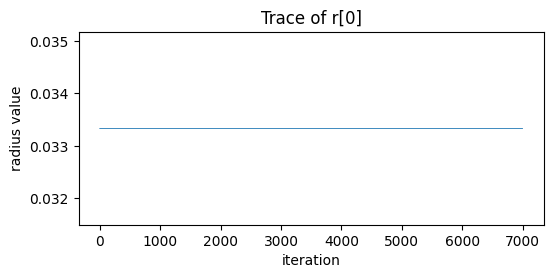

In [7]:

actor_idx = 0
r_single = R_chain[:, actor_idx]
acc_single = acceptance_rate(r_single)
print(f"Acceptance rate for r[{actor_idx}] : {acc_single:6.3%}")

plt.figure(figsize=(6, 2.5))
plt.plot(r_single, lw=0.6)
plt.title(f"Trace of r[{actor_idx}]")
plt.xlabel("iteration")
plt.ylabel("radius value")
plt.show()

In [ ]:
results = {
    "β_IN"  : acceptance_rate(betaIN_chain),
    "β_OUT" : acceptance_rate(betaOUT_chain),
    "τ²"    : acceptance_rate(tauSq_chain),
    "σ²"    : acceptance_rate(sigmaSq_chain),
}
print("Metropolis–Hastings acceptance rates")
for k, acc in results.items():
    print(f"{k:18s}:  {acc:6.3%}  (rejection {1-acc:6.3%})")


--- Metropolis–Hastings acceptance rates ---
β_IN              :  2.843%  (rejection 97.157%)
β_OUT             :  0.114%  (rejection 99.886%)
τ²                :  100.000%  (rejection 0.000%)
σ²                :  100.000%  (rejection 0.000%)


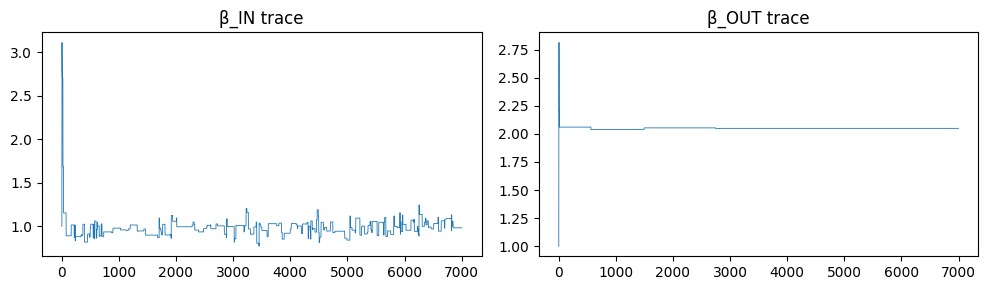

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharex=True)
ax[0].plot(betaIN_chain, lw=0.6);  ax[0].set_title("β_IN trace")
ax[1].plot(betaOUT_chain, lw=0.6); ax[1].set_title("β_OUT trace")
plt.tight_layout()